In [29]:
include(joinpath(@__DIR__, "../src/main.jl")) 
include("EAX.jl")
using XLSX
using OffsetArrays

function Write_to_excel(row::Int, col::Int, obj::Float64)
    sheetnumber = 2
    cols = ["B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
    XLSX.openxlsx("He_Results.xlsx", mode="rw") do xf
        sheet = xf[sheetnumber]
        sheet[cols[col]*string(row)] = obj
    end
end

Write_to_excel (generic function with 1 method)

In [7]:
# instances = [:eil51]
# Ms = [2]
# test(instances, Ms)

In [8]:
# dir_name = "set1"
# sample_names = ["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"]

# Solve_instances(dir_name, sample_names)

In [35]:

dir_name = "set1"
sample_names = ["mtsp150_5"] #["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"] #["mtsp51_3", "mtsp51_5", "mtsp51_10", "mtsp100_3", "mtsp100_5", "mtsp100_10", "mtsp100_20", "mtsp150_3", 
#      "mtsp150_5", "mtsp150_10", "mtsp150_20", "mtsp150_30", "gtsp150_3", "gtsp150_5", "gtsp150_10", "gtsp150_20", 
#     "gtsp150_30", "kroa200_3", "kroa200_5","kroa200_10","kroa200_20", "lin318_3", "lin318_5", "lin318_10", "lin318_20"]
# sample_names = ["att532_3", "att532_5", "att532_10", "att532_20"]
# T, depot, Customers = Calculate_TSPLIB(sample_name)
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]

row = 0
for sample_name in sample_names
    row += 1
    println(sample_name)
    m, T, depot_, customers = read_data(dir_name, sample_name)
    Customers = copy(transpose(customers))
    depot = Float64.(depot_)
    n = size(T)[1]-2
    demands = ones(Int, n)
    W = 1000
    h = 0.3
    popsize = (10,20)
    k_tournament = 2
    num_iter = 1000000
    time_limit = (n+1)/5 #*240/100
    Mutation_Chance = 1.0
    num_runs = 20
    num_nei = 2
    avg = 0.0
    best = Inf
    worst = 0.0
    crossover_functions = [1, 2]

    t1 = time()
    for i=1:num_runs
        P, roullet = Perform_Genetic_Algorithm(T, m, h, popsize, 
                    k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
    #             roullet_ = roullet_ + roullet
#         Write_to_excel(row, i, P[1].fitness)
        avg += P[1].fitness
        push!(all_chrms, P[1])
        if P[1].fitness < best
            best = P[1].fitness
            best_chrm = P[1]
        end
        if P[1].fitness > worst
            worst = P[1].fitness
            worst_chrm = P[1]
        end
    end
    t2 = time()
    println("Results for ", sample_name, " ,m=", m)
    println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
        "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
end

mtsp150_5
Generation 0 the best objective is: 9981.263917017885
Generation 1000 the best objective is: 8780.392081515918
Generation 2000 the best objective is: 8780.392081515918
Generation 3000 the best objective is: 8770.672890018544
Generation 4000 the best objective is: 8759.384619152117
Generation 5000 the best objective is: 8759.384619152117
Generation 6000 the best objective is: 8759.384619152117
Generation 7000 the best objective is: 8759.384619152117
Generation 8000 the best objective is: 8759.384619152117
Generation 9000 the best objective is: 8759.384619152117
Generation 10000

LoadError: InterruptException:

In [35]:
sample_name = :pcb3038
T, depot, Customers = Calculate_TSPLIB(sample_name)
n = size(T)[1]-2
t1 = time()
tsp_tour, obj = find_tsp_tour1(T[1:n+1, 1:n+1])
time() - t1

621.7330000400543

In [39]:
include("GA.jl")
include("Neighborhood.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Split.jl")

row = 25
for sample_name in [:fnl4461, :rl5915]
# sample_name = :pcb1173
    T, depot, Customers = Calculate_TSPLIB(sample_name)
    for m in [3, 5, 10, 20]
        row += 1
        println(sample_name,"_", m)
        best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
        worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
        all_chrms = Chromosome[]    
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 10000
        h = 0.3
        popsize = (10,20)
        k_tournament = 2
        num_iter = 10000
        time_limit = (n+1)*240/100
        Mutation_Chance = 1.0
        num_runs = 1
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        crossover_functions = [9]

        t1 = time()
        for i=1:num_runs
            P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
#                     roullet_ = roullet_ + roullet
#             Write_to_excel(row, i, P[1].fitness)
            avg += P[1].fitness
            push!(all_chrms, P[1])
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
        end
        t2 = time()
        println("Results for ", sample_name, " ,m=", m)
        println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
            "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
    end
end

fnl4461_3
Generation 0 the best objective is: 69186.32832830166
Generation 10 the best objective is: 69186.32832830166
Generation 20 the best objective is: 69186.32832830166
Generation 30 the best objective is: 67458.23937228355
Generation 40 the best objective is: 67458.23937228355
Generation 50 the best objective is: 67458.23937228355
Generation 60 the best objective is: 67216.98187656543
Generation 70 the best objective is: 67216.98187656543
Generation 80 the best objective is: 67216.98187656543
Generation 90 the best objective is: 67216.98187656543
Generation 100 the best objective is: 67216.98187656543
Generation 110 the best objective is: 67216.98187656543
Generation 120 the best objective is: 67216.98187656543
Generation 130 the best objective is: 67216.72913508052
Generation 140 the best objective is: 67216.72913508052
Generation 150 the best objective is: 67216.72913508052
Generation 160 the best objective is: 67216.72913508052
Generation 170 the best objective is: 67216.72913

Generation 620 the best objective is: 41239.10441226163
Generation 630 the best objective is: 41239.10441226163
Generation 640 the best objective is: 41239.10441226163
Generation 650 the best objective is: 41239.10441226163
Generation 660 the best objective is: 41239.10441226163
Generation 670 the best objective is: 41239.10441226163
Generation 680 the best objective is: 41239.10441226163
Generation 690 the best objective is: 41239.10441226163
Generation 700 the best objective is: 41239.10441226163
Generation 710 the best objective is: 41239.10441226163
Generation 720 the best objective is: 41210.21186831771
Generation 730 the best objective is: 41210.21186831771
Generation 740 the best objective is: 41210.21186831771
Generation 750 the best objective is: 41210.21186831771
Generation 760 the best objective is: 41210.21186831771
Generation 770 the best objective is: 41210.21186831771
Generation 780 the best objective is: 41210.21186831771
Generation 790 the best objective is: 41210.2118

LoadError: InterruptException:

In [78]:
obj, trips = SPLIT(TT, demands, K, W, tsp_tour)

20651.57683128553
20656.016358360772
20674.76461419524
20677.969644535675
20678.075556984226
20679.026489128355
20679.14603641297
20682.669427729263
20692.962759744652
20692.962759744652
20745.23984357239
20767.897095200067
20860.00514439214
20980.473424078235
20994.887586512916
21114.442754591604
21172.289343882505
21254.2061306197
21405.233233017363
21414.671706144516
22190.374533416794
27397.168201478184
28297.256328854466


In [79]:
length(P)

23

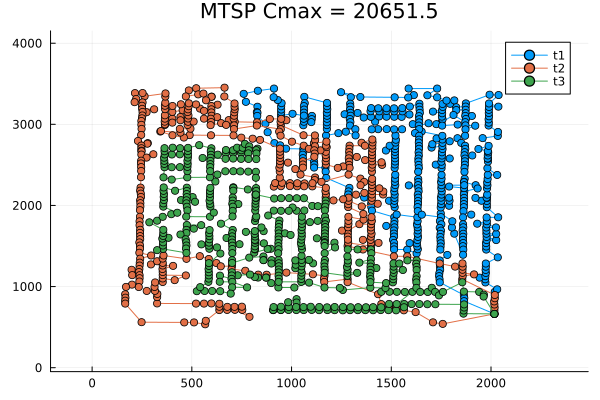

In [80]:
include("Initial.jl")
best_chrm = deepcopy(P[1])
best_chrm = Enrich_the_chromosome(best_chrm, T, Customers, depot, n)
include("Draw.jl")
Draw_Solution(best_chrm, depot, Customers, "MTSP", best_chrm.fitness)

In [81]:
genes = Int[]
for tour in best_chrm.tours
    genes = vcat(genes, tour.Sequence)
    println(find_tour_length(tour.Sequence, T), "  ", tour.cost)
end

20630.64601552799  20630.646015527996
20651.519427852683  20651.519427852687
20634.305997443327  20634.305997443334


In [19]:
using Hygese

In [ ]:
Hygese

In [21]:
function find_tsp_tour2(Ct::Matrix{Float64})
    scale_factor = 1000
    dist_mtx = round.(Int, Ct .* scale_factor)

    # tsp_tour, tsp_tour_len = Concorde.solve_tsp(dist_mtx)
    tsp_tour, tour_length = Hygese.solve_tsp(dist_mtx)

    @assert tsp_tour[1] == 1

    return tsp_tour[2:length(tsp_tour)].-1, tour_length/scale_factor
end

find_tsp_tour2 (generic function with 1 method)

In [22]:
t1 = time()
tsp_tour, obj1 = find_tsp_tour1(T[1:n+1, 1:n+1]);
t2 = time()

println(obj1)
println(t2-t1)

56931.204
45.08200001716614


In [1]:
t1 = time()
tsp_tour2, obj2 = find_tsp_tour2(T[1:n+1, 1:n+1]);
t2 = time()

println(obj1)
println(t2-t1)

LoadError: UndefVarError: n not defined

In [16]:
t1 = time()
obj, trips = SPLIT(T, demands, m, W, tsp_tour)
chrm = Chromosome(tsp_tour, obj, 0.0, trips)
t2 = time()
t2-t1

0.24199986457824707

In [140]:

n_nodes = size(T)[1] - 2
t1 = time()
S = Creat_Random_Cromosome2(T, n_nodes, m)
obj, trips = SPLIT(T, demands, m, W, S)
chrm = Chromosome(S, obj, 0.0, trips)
# chrm = initial_kmedian_solution(T, Customers, depot, m)
t2 = time()
t2 - t1

0.26200008392333984

In [141]:
chrm.fitness

7842.054639077517

In [142]:
t1 = time()
Solve_all_intersections(chrm, Customers, depot, T)
t2 = time()
t2 - t1

1.180999994277954

In [143]:

t1 = time()
chrm = Enrich_the_chromosome(chrm, T, Customers, depot, n_nodes)
t2 = time()
t2 - t1

0.020999908447265625

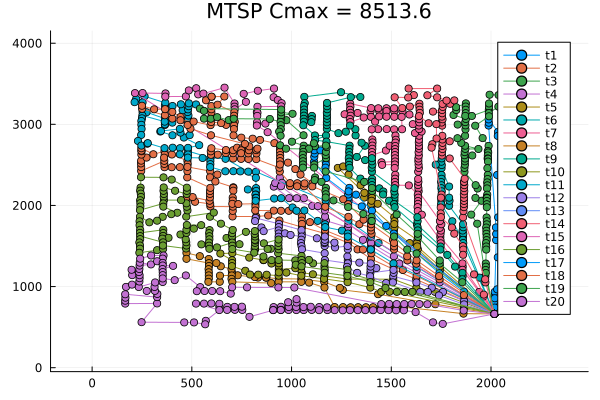

In [144]:
Draw_Solution(chrm, depot, Customers, "MTSP", chrm.fitness)

In [50]:
c1 = deepcopy(chrm)
c1 = Enrich_the_chromosome(c1, T, Customers, n)
Draw_Solution(c1, depot, Customers, "MTSP", c1.fitness)

LoadError: MethodError: no method matching Enrich_the_chromosome(::Chromosome, ::Matrix{Float64}, ::Matrix{Float64}, ::Int64)
[0mClosest candidates are:
[0m  Enrich_the_chromosome(::Chromosome, ::Matrix{Float64}, ::Matrix{Float64}, [91m::Vector{Float64}[39m, [91m::Int64[39m) at C:\Users\sasanm\Documents\GitHub\m-TSP\Initial.jl:335

In [51]:
c2 = deepcopy(c)
c2 = Enrich_the_chromosome(c2, T, Customers, n)
Draw_Solution(c2, depot, Customers, "MTSP", c2.fitness)

LoadError: UndefVarError: c not defined

In [22]:
ones(2,2) * -1

2×2 Matrix{Float64}:
 -1.0  -1.0
 -1.0  -1.0

In [2]:
using TSPSolvers
using Test 

@testset "simple TSP" begin
    M = [
        0  16   7  14
        16   0   3   5
        7   3   0  16
        14   5  16   0 
    ]

    for algo in TSPSolvers.supported_algorithms
        tour, cost = solve_tsp(M; algorithm=algo)
        @test cost == 29
    end

end

LoadError: ArgumentError: Package TSPSolvers not found in current path:
- Run `import Pkg; Pkg.add("TSPSolvers")` to install the TSPSolvers package.


In [3]:
import Pkg; 
Pkg.add("TSPSolvers")

    Updating registry at `C:\Users\sasanm\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`


LoadError: The following package names could not be resolved:
 * TSPSolvers (not found in project, manifest or registry)


In [1]:
using TSPSolvers
using TSPLIB
include("Create_Sample.jl")
# include("Initial.jl")
# include("GA.jl")


read_data (generic function with 1 method)

In [7]:
T, depot, Nodes = Calculate_TSPLIB(:fl1400)
n = size(T)[1] - 1
scale_factor = 1000
dist_mtx = round.(Int, T[1:n,1:n] .* scale_factor);

In [12]:
t1 = time()
tour, obj = solve_tsp(dist_mtx; algorithm="NearestNeighbor", firstcity=1) 
println("cost= $(obj/scale_factor), runtime= $(time()-t1)" )

cost= 22275.935, runtime= 0.06500005722045898


In [10]:
M = [
        0  16   7  14
        16   0   3   5
        7   3   0  16
        14   5  16   0 
    ]

4×4 Matrix{Int64}:
  0  16   7  14
 16   0   3   5
  7   3   0  16
 14   5  16   0

In [20]:
tsp_tour, obj = find_tsp_tour2(Float64.(M))

([2, 1, 3], 29.0)

In [18]:
tour, obj = solve_tsp(M; algorithm="NearestNeighbor", firstcity=1) 

([1, 3, 2, 4], 29)

In [6]:
a = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

Crossover_HX_ (generic function with 1 method)

In [80]:
sample_name = :eil51
T, depot, Customers = Calculate_TSPLIB(sample_name)
n = size(T)[1]-2


50

In [81]:
p1 = shuffle([i for i=1:n])
p2 = shuffle([i for i=1:n]);

In [36]:
function closenodes_for_crossover(T::Matrix{Float64}, h::Float64)
    n_nodes = size(T)[1] - 2
    num = Int(ceil(h * n_nodes))
    ClosenessT = zeros(Int, n_nodes+1, num)
    for i = 1:n_nodes+1
        a = copy(T[i, 1:n_nodes+1])
        b = sortperm(a)
        ClosenessT[i, :] = b[2:num+1] .- 1
    end
    return ClosenessT
end

closenodes_for_crossover (generic function with 1 method)

In [86]:
c1 = Crossover_HX_(T, p1, p2, n) 
c2 = Crossover_HX(T, p1, p2, n) ;

In [92]:
for i in c1
    print(i, " ")
end
println()
for i in c2
    print(i, " ")
end

23 26 21 19 33 8 45 49 48 36 43 22 2 32 18 24 42 7 11 29 9 31 50 14 44 3 39 10 16 41 4 46 5 47 6 30 15 20 38 34 1 27 40 13 35 12 25 17 37 28 
49 48 36 43 22 2 32 18 24 42 7 11 26 21 19 33 8 45 28 27 35 4 46 5 47 6 30 15 20 38 50 31 1 34 16 41 9 29 17 10 40 14 44 3 39 12 25 23 37 13 